In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("beer_profile_and_ratings.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [3]:
df = data.drop(['Beer Name (Full)', 
                'Name', 
                'Brewery', 
                'Description',
                'review_aroma', 
                'review_appearance', 
                'review_palate', 
                'review_taste',
                'review_overall',
                'number_of_reviews'
               ], axis=1)

In [4]:
df.head()

,Style,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Altbier,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111
1,Altbier,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84
2,Altbier,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62
3,Altbier,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119
4,Altbier,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95


In [5]:
df.isnull().sum()

Style          0
ABV            0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [18]:
df_grouped = df.groupby("Style")["Malty"].mean()

In [19]:
df_grouped = df_grouped.to_frame().reset_index()

In [22]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Style   111 non-null    object 
 1   Malty   111 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [21]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
data_cus1_dummy = pd.get_dummies(df_grouped , drop_first = True)

number of cluster 2, silhouette 0.6282330548399118
number of cluster 3, silhouette 0.5792977065396947
number of cluster 4, silhouette 0.5689289043156535
number of cluster 5, silhouette 0.5781990971211021
number of cluster 6, silhouette 0.6012407349831754
number of cluster 7, silhouette 0.5898436166333563
number of cluster 8, silhouette 0.5566746230334763
number of cluster 9, silhouette 0.560014042064524
number of cluster 10, silhouette 0.5576897370090934


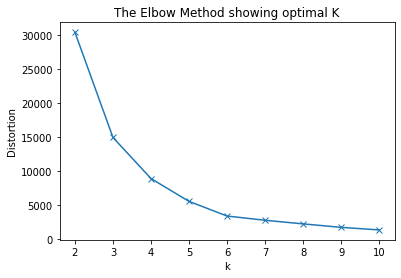

In [24]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()
cluster(data_cus1_dummy,10)

elbow metoduna göre 4 gruba ayrılması daya uygundur

In [25]:
model = KMeans(n_clusters = 4)

model = model.fit(data_cus1_dummy)

pred = model.predict(data_cus1_dummy)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


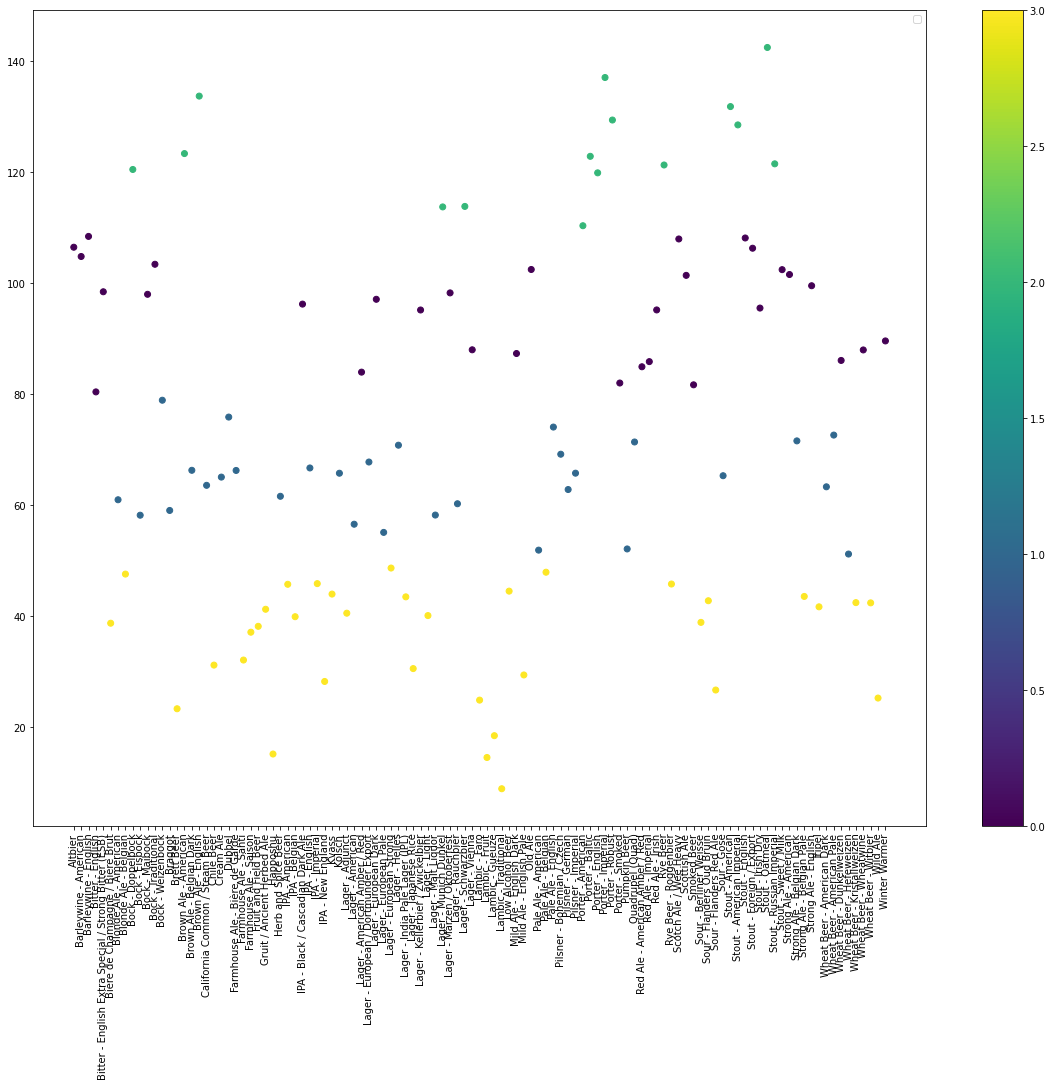

In [29]:
plt.figure(figsize = (20,15))  
plt.scatter(df_grouped["Style"],df_grouped["Malty"] , c = pred)
plt.legend()
plt.xticks(rotation = 90)
plt.colorbar()
plt.show() 